In [1]:
from sklearn.datasets import fetch_california_housing
fetch_california_housing=fetch_california_housing(as_frame=True)
data=fetch_california_housing.frame

In [2]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
sns.pairplot(data=data,hue='MedHouseVal',palette='tab10')
plt.show()

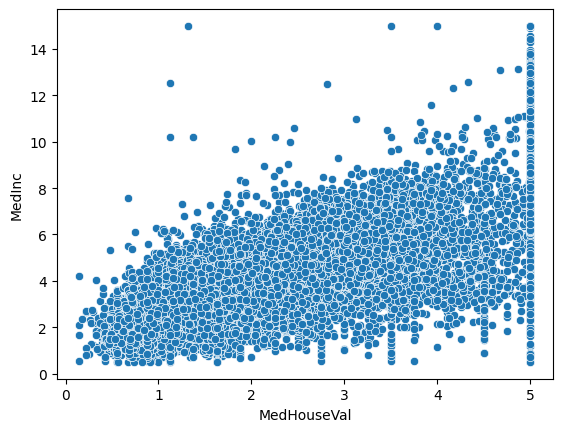

In [4]:
sns.scatterplot(data=data,x='MedHouseVal',y='MedInc')
plt.show()

In [5]:
def cost_function(data,m,c):
    #equation of best fit line --> y=mx+c
    # predicted point y^=mx1+c
    #distance --> (y^-y)^2
    #cost_function==Jn=1/2n(sum((y-y^)^2))
    Jn=0
    # n= total data points
    n=(data.shape)[0]
    const_term=1/(2*n) 
    for index,row in data.iterrows():
        # x-axis--> MedHouseVal
        # y-axis --> MedInc
        x=row['MedHouseVal']
        y=row['MedInc']
        predicted_y=m*x+c
        Jn=Jn+(const_term)*((y-predicted_y)**2)

    return Jn

In [6]:
import numpy as np
##  define a range of m and c to create a multi-diamentional gradient descent curve
#c--> [-6 to +6]
#m--> [0 to 6]
#store cost_function, m, and c
Jn=[]
for m in np.arange(0,7,1):
    for c in np.arange(-6, 7,1):
        cost_function_value=cost_function(data,m,c)
        print(cost_function_value,m,c)
        Jn.append([cost_function_value,m,c])

50.519646868663195 0 -6
41.14897586575613 0 -5
32.77830486284909 0 -4
25.40763385994216 0 -3
19.036962857035114 0 -2
13.6662918541282 0 -1
9.29562085122123 0 0
5.924949848314182 0 1
3.554278845407229 0 2
2.1836078425002308 0 3
1.8129368395932397 0 4
2.4422658366862833 0 5
4.071594833779291 0 6
31.398429587796077 1 -6
24.096316753978396 1 -5
17.794203920160484 1 -4
12.492091086342702 1 -3
8.18997825252483 1 -2
4.887865418707039 1 -1
2.585752584889225 1 0
1.2836397510713764 1 1
0.9815269172535601 1 2
1.6794140834357172 1 3
3.3773012496179127 1 4
6.075188415800026 1 5
9.773075581982207 1 6
17.887695505916653 2 -6
12.654140841187933 2 -5
8.420586176459313 2 -4
5.187031511730534 2 -3
2.953476847001865 2 -2
1.7199221822731907 2 -1
1.4863675175445143 2 0
2.2528128528158287 2 1
4.019258188087163 2 2
6.785703523358404 2 3
10.552148858629797 2 4
15.318594193901161 2 5
21.08503952917236 2 6
9.987444623024253 3 -6
6.822448127384744 3 -5
4.657451631745189 3 -4
3.4924551361056464 3 -3
3.327458640466

In [7]:
#find global minima assuming mand c shall be interger
j,m,c=float('inf'),None,None
for group in Jn:
    J,M,C=group[0],group[1],group[2]
    if J<j:
        m=M
        c=C
        j=J

print(m,c)

1 2


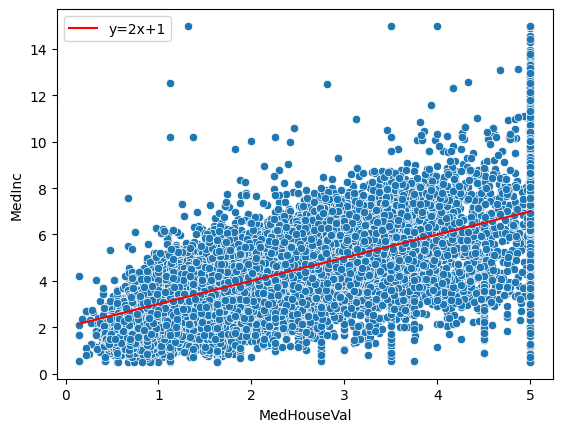

In [8]:
sns.scatterplot(data=data,x='MedHouseVal',y='MedInc')
# define the line y = 2x + 1
x_vals = np.linspace(data['MedHouseVal'].min(), data['MedHouseVal'].max(), 100)
y_vals = 1 * x_vals + 2

# plot the line
plt.plot(x_vals, y_vals, color='red', label='y=2x+1')

# add legend
plt.legend()
plt.show()